# Regression Trees

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
df = pd.read_csv('bases/auto-mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [5]:
# Eliminando valores '?'
# re.sub('?', np.nan, df['horsepower'])
# df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df = df[df['horsepower']!='?']

In [6]:
features = ['horsepower', 'weight']
# Garantindo que estão no formato correto
for ft in features:
    df[ft] = pd.to_numeric(df[ft])
# Construindo matriz de features e vetor de true labels
X = df[features]
y = df['mpg'].values.tolist()

In [7]:
# Instanciando
reg = DecisionTreeRegressor(max_depth=2, min_samples_split=3)

In [8]:
# Fit
reg.fit(X,y)

DecisionTreeRegressor(max_depth=2, min_samples_split=3)

In [9]:
# Visualizando
print(tree.export_text(reg))

|--- feature_1 <= 2764.50
|   |--- feature_0 <= 70.50
|   |   |--- value: [33.68]
|   |--- feature_0 >  70.50
|   |   |--- value: [27.01]
|--- feature_1 >  2764.50
|   |--- feature_0 <= 127.00
|   |   |--- value: [20.67]
|   |--- feature_0 >  127.00
|   |   |--- value: [14.72]



In [10]:
#predict
reg.predict([['300','4000']])

/Users/dhenyfernandes/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([14.72142857])

# Prunning

In [11]:
# vamos usar um dataset diferente para entender o processo de prunning
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [12]:
#separando o arquivo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
#Calculando Cost Complexity Pruning
# Aqui, vou usar Decision Tree Classifier, voltado para classificação, apenas para fins didáticos. O processo é o mesmo para regressão
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train,y_train)

In [14]:
path

{'ccp_alphas': array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
        0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
        0.02314163, 0.03422475, 0.32729844]),
 'impurities': array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
        0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
        0.10634033, 0.14056508, 0.46786352])}

In [15]:
# obtendo valores de alpha e impureza
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

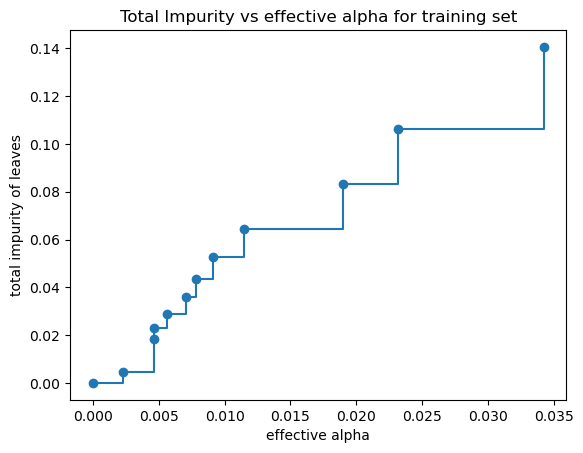

In [16]:
# plot
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [17]:
# Treinando a árvore com diferentes valores de alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


In [18]:
# eliminando o último elemento de clfs e ccp_alphas por que representa a árvore com apenas uma folha
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

In [19]:
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0022664723976040134, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004647426339100881, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004659799593581376, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005633802816901408, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007042253521126761, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007841938420144537, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.009114019793328328, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011443661971830986, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.018988002086593604, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.023141627543035996, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.03422474765119576, random_state=0)]

In [20]:
#Obtendo os scores para cada valor de aplha
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

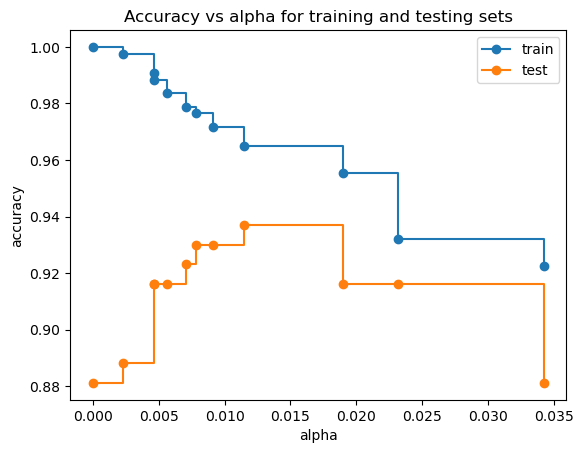

In [21]:
#plotando
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Decision Trees

In [22]:
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


In [23]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
 
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

É possível visualizar a árvore de decisão treinada usando o método export_graphviz(). 
OBS: Verifique se o pacote está instalado

In [ ]:
from sklearn.tree import export_graphviz

def image_path(fig_id):
    return os.path.join(IMAGES_PATH, fig_id)

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Agora, vá em File -> New -> Terminal:

1. Navegue até a pasta onde o arquivo ires_tree.dot foi gerado 
2. Execute o seguinte código: dot -Tpng .\iris_tree.dot -o iris_tree.png

Isso vai gerar um arquivo png que mostrará como ficou nossa árvore. Vou adicioná-la aqui para facilitar nosso entendimento

<img src="images/decision_trees/iris_tree.png" />

### Como o classificador realiza novas predições?

- Começando pela raiz, verifique se o comprimento da pétala é menor que 2.45cm.

    - Se for, vá para o nó da esquerda. Como é um nó folha, a árvore prediz que a classe é setosa
    
    - Se não, vá para o nó da direita. Verifique se a largura da folha é menor que 1.75cm.
    
        - Se for, vá para o nó folha da esquerda. A flor será classificada como versicolor
        
        - Se não, vá para o nó folha da direita. A flor será classificada como virginica

### Desicion Boundaries
É possível verificar as fronteiras de decisão que o arquivo encontrou na construção da árvore. O código abaixo nos fornece uma visualização. 

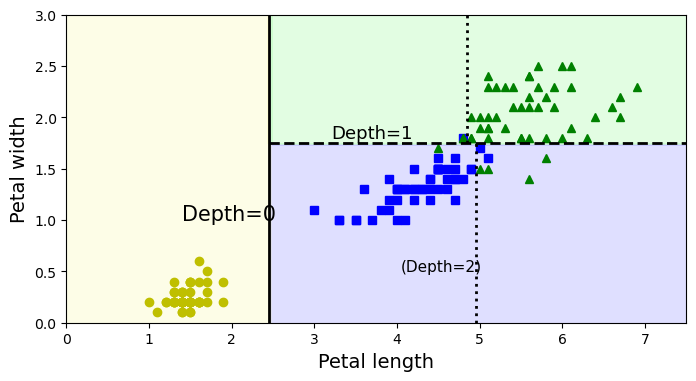

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

A linha mais grossa representa a fronteira de decisão do nó raiz: petal length = 2.45cm. Como a área à esquerda é pura, não há mais splits. Entretanto, a área à direita é impura, então o nó é dividido quando petal eidth = 1.75cm. Visto que max_depth=2, Decision Tree para aqui. 

### Estimando as probabilidades das classes

Uma Árvore de Decisão pode estimar a probabilidade de uma instância pertencer a uma classe particular. Suponha que uma flor tenha 5cm de comprimento e 1.5cm de largura. O nó correspondente seria o Depth-2 a esquerda. Nesse caso, a Árvore retornaria as seguintes probabilidades:

- 0% parra *Iris Setosa* (0/54)
- 90.7% para *Iris Versicolor* (49/54)
- 9.3% para Iris Virginica* (5/54)

In [26]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

E se você solicitar a predição da classe, o algoritmo retornará *Iris versicolor* (classe 1), visto que ela possui a maior probabilidade:

In [27]:
tree_clf.predict([[5, 1.5]])

array([1])

### Regularização dos Hiperparâmetros

Árvores de decisão assumem poucas suposições acerca dos dados de treinamento (ao contrário dos modelos lineares, que assumem que os dados são lineares). Se deixada sem restrição, a árvore irá se adaptar aos dados de treino, dando um fit muito próximo (na verdade, overfit). 

Tais modelos são chamados não-paramétricos, mas não porque não possuem parâmetros (ou hiperparâmetros), mas porque o número de parâmetros não é determinado antes do treino.

PAra evitar overfitting, é preciso restringir a liberdade da Árvore de Decisão durante o treinamento. Isto é chamado de regularização. Alguns hiperparâmetros que podem ser ajustados para evitar overfitting numa Árvore de decisão:

- max_depth (profundidade máxima da árvore - delimita o número de splits)
- min_samples_split (número mínimo de amostras que um nó deve ter antes do split)
- min_sampes_leaf (número mínimo de amostras que um nó folha deve ter)

O código abaixo apresenta duas Árvores treinadas no dataset moons. A da esquerda foi treinada com hiperparâmetros padrões (sem restrições), enquanto a da direita foi regularizada (min_samples_leaf=4). 

Podemos observar que o modelo da esquerda está dando overfiting e que o modelo da direita irá generalizar melhor. 

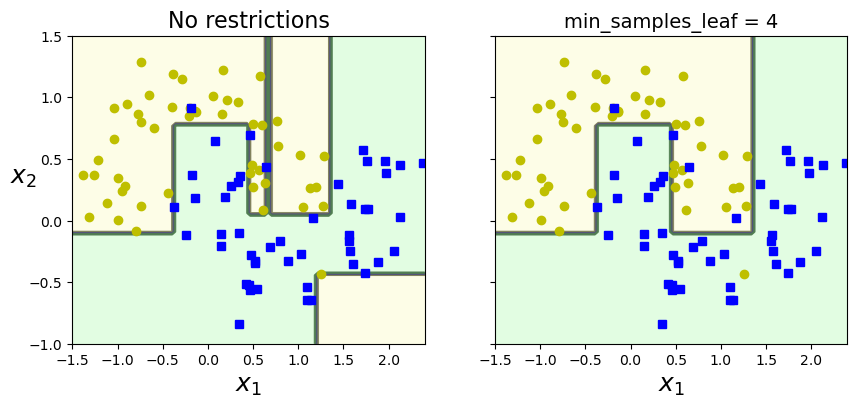

In [28]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4,random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()